In [1]:
# !pip install tensorflow matplotlib 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [4]:
# Build the CNN model 
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
MaxPooling2D((2, 2)),
Conv2D(32, (3, 3), activation='relu'),
MaxPooling2D((2, 2)), Flatten(),
Dense(10, activation='softmax') ])

In [5]:
# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
1563/1563 - 18s - loss: 1.5405 - accuracy: 0.4487 - val_loss: 1.3158 - val_accuracy: 0.5354 - 18s/epoch - 12ms/step
Epoch 2/10
1563/1563 - 16s - loss: 1.2366 - accuracy: 0.5671 - val_loss: 1.2157 - val_accuracy: 0.5804 - 16s/epoch - 10ms/step
Epoch 3/10
1563/1563 - 17s - loss: 1.1219 - accuracy: 0.6112 - val_loss: 1.0995 - val_accuracy: 0.6203 - 17s/epoch - 11ms/step
Epoch 4/10
1563/1563 - 17s - loss: 1.0468 - accuracy: 0.6358 - val_loss: 1.0604 - val_accuracy: 0.6257 - 17s/epoch - 11ms/step
Epoch 5/10
1563/1563 - 17s - loss: 1.0012 - accuracy: 0.6511 - val_loss: 1.0196 - val_accuracy: 0.6500 - 17s/epoch - 11ms/step
Epoch 6/10
1563/1563 - 17s - loss: 0.9687 - accuracy: 0.6650 - val_loss: 1.0116 - val_accuracy: 0.6541 - 17s/epoch - 11ms/step
Epoch 7/10
1563/1563 - 17s - loss: 0.9412 - accuracy: 0.6750 - val_loss: 0.9999 - val_accuracy: 0.6590 - 17s/epoch - 11ms/step
Epoch 8/10
1563/1563 - 17s - loss: 0.9170 - accuracy: 0.6821 - val_loss: 0.9708 - val_accuracy: 0.6671 - 17s/ep

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test) 
print(f'Test accuracy: {test_acc:.2f}')


313/313 [==============================] - 1s 3ms/step - loss: 1.0190 - accuracy: 0.6524
Test accuracy: 0.65


1/1 [==============================] - 0s 100ms/step


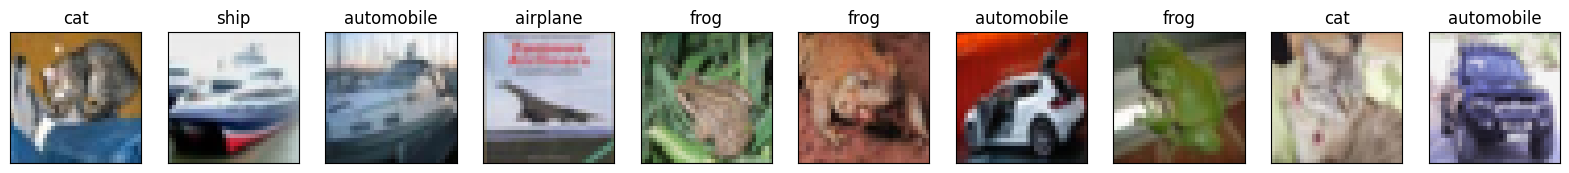

In [7]:
# Predict and visualize some test images 
predictions = model.predict(X_test[:10]) 
plt.figure(figsize=(20, 4))
for i in range(10): 
    plt.subplot(2, 10, i + 1) 
    plt.imshow(X_test[i]) 
    plt.xticks([])
    plt.yticks([]) 
    plt.title(classes[np.argmax(predictions[i])])
plt.show()